In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('archive/train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [10]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [11]:
Mean=df['Item_Weight'].mean()
Median=df['Item_Weight'].median()

In [12]:
df['Item_Weight_mean'] = df['Item_Weight'].fillna(Mean)
df['Item_Weight_median'] = df['Item_Weight'].fillna(Median)

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [14]:
print("Original Weight variable variance",df['Item_Weight'].var())
print("Item Weight variance after mean imputation",df['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",df['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


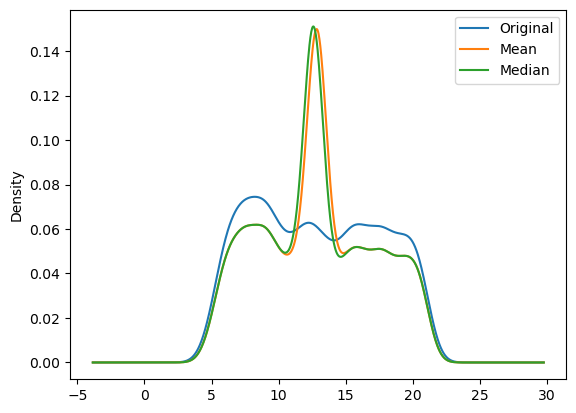

In [15]:
df['Item_Weight'].plot( kind="kde",label="Original")
df['Item_Weight_mean'].plot( kind="kde",label="Mean")
df['Item_Weight_median'].plot( kind="kde",label="Median")
plt.legend()
plt.show()

<Axes: >

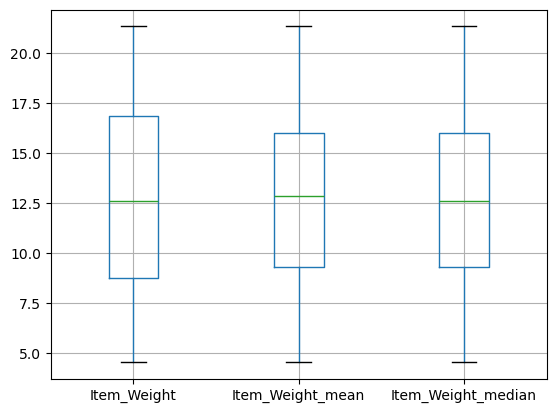

In [16]:
df[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

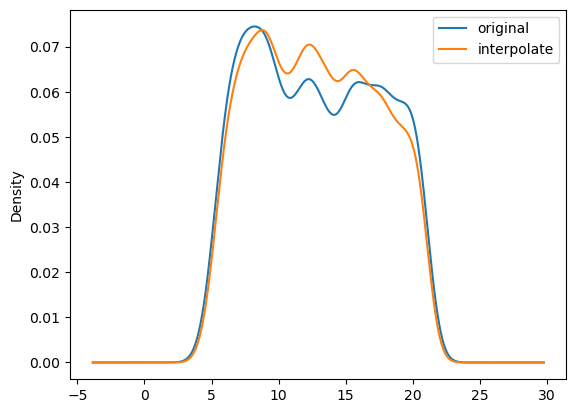

In [17]:
df['Item_Weight_Interpolate']=df['Item_Weight'].interpolate(method="linear")
df['Item_Weight'].plot(kind="kde",label="original")
df['Item_Weight_Interpolate'].plot(kind="kde",label="interpolate")
plt.legend()

In [18]:
from sklearn.impute import KNNImputer 

In [19]:
knn = KNNImputer(n_neighbors=10,weights="distance")
df['knn_imputer']=knn.fit_transform(df[['Item_Weight']]).ravel()

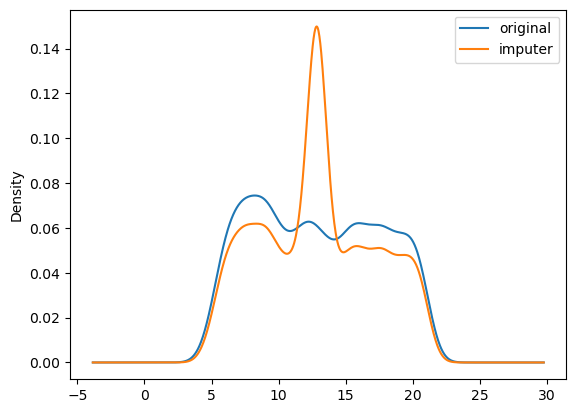

In [20]:
df['Item_Weight'].plot(kind="kde",label="original")
df['knn_imputer'].plot(kind="kde",label="imputer")
plt.legend()

In [21]:
df=df.drop(['Item_Weight','Item_Weight_median','Item_Weight_mean','knn_imputer'],axis=1)

In [22]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [23]:
df.rename(columns={
    'Item_Weight_Interpolate': 'Item_Weight',
}, inplace=True)

In [24]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                     0
dtype: int64

In [25]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [26]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [27]:
Mode_outlet = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0])


In [55]:
Mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [56]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: Mode_outlet[x])


In [57]:
df.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Weight             0
Outlet_age              0
dtype: int64

In [61]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Outlet_age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,25
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,15
2,FD,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,25
3,FD,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,26
4,NC,Low Fat,0.014751,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,37


In [32]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [33]:
df.replace({'Item_Fat_Content':{ 'LF' : 'Low Fat' ,'low fat' :'Low Fat' , 'reg' : 'Regular'}},inplace=True)

In [34]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [35]:
df['Item_Visibility'].value_counts()


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [36]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [37]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.014751,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [38]:
df['Item_Visibility'].value_counts()


Item_Visibility
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

In [39]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [40]:
df['Item_Identifier'].value_counts().sample(10)

Item_Identifier
FDE35    5
NCJ05    6
FDK24    6
FDL46    7
FDW16    4
FDN34    6
FDW23    6
FDG47    6
NCU17    7
FDZ39    6
Name: count, dtype: int64

In [41]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[:2])
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [42]:
import datetime as dt
current_year = dt.datetime.today().year
print(current_year)

df['Outlet_age']= current_year - df['Outlet_Establishment_Year']
df.head()

2024


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Outlet_age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,25
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,15
2,FD,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,25
3,FD,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800,19.20,26
4,NC,Low Fat,0.014751,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,37


In [43]:
df= df.drop('Outlet_Establishment_Year',axis=1)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Outlet_age
0,FD,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,25
1,DR,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,15
2,FD,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,25
3,FD,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800,19.20,26
4,NC,Low Fat,0.014751,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,37


In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Copy the DataFrame
data_encoded = df.copy()

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
data_encoded[cat_cols] = data_encoded[cat_cols].astype(str)

# Encode categorical columns
for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]]).flatten()
    print(f"Categories for {col}: {oe.categories_}")




Categories for Item_Identifier: [array(['DR', 'FD', 'NC'], dtype=object)]
Categories for Item_Fat_Content: [array(['Low Fat', 'Regular'], dtype=object)]
Categories for Item_Type: [array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
Categories for Outlet_Identifier: [array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
Categories for Outlet_Size: [array(['High', 'Medium',
       'Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \\\nOutlet_Size         Small             Small            Medium   \n\nOutlet_Type Supermarket Type3  \nOutlet_Size            Medium  ',
       'Small'], dtype=object)]
Categories for Outlet_Location_Type: [array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]

In [45]:
# Separate features and target variable
X = data_encoded.drop('Item_Outlet_Sales', axis=1)
y = data_encoded['Item_Outlet_Sales']

In [46]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5579423947396737


In [47]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5952274750361273


In [48]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
8,Outlet_Type,0.418728
5,Outlet_Identifier,0.178076
10,Outlet_age,0.163267
4,Item_MRP,0.154268
6,Outlet_Size,0.057331
7,Outlet_Location_Type,0.019924
2,Item_Visibility,0.002531
9,Item_Weight,0.002201
3,Item_Type,0.001841
0,Item_Identifier,0.001042


In [49]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility','Item_Weight',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5963219675876089


In [50]:
final_data = X.drop(columns=['Item_Visibility','Item_Weight',
'Item_Type','Outlet_Identifier','Item_Identifier','Item_Fat_Content'],axis=1)
print(final_data)
print(X)

      Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  Outlet_age
0     249.8092          1.0                   0.0          1.0          25
1      48.2692          1.0                   2.0          2.0          15
2     141.6180          1.0                   0.0          1.0          25
3     182.0950          2.0                   2.0          0.0          26
4      53.8614          0.0                   2.0          1.0          37
...        ...          ...                   ...          ...         ...
8518  214.5218          0.0                   2.0          1.0          37
8519  108.1570          2.0                   1.0          1.0          22
8520   85.1224          3.0                   1.0          1.0          20
8521  103.1332          1.0                   2.0          2.0          15
8522   75.4670          3.0                   0.0          1.0          27

[8523 rows x 5 columns]
      Item_Identifier  Item_Fat_Content  Item_Visibility  Item_Type  Item_M

In [51]:
from xgboost import XGBRFRegressor
xg_final = XGBRFRegressor()
xg_final.fit(final_data,y)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)
xg_final.fit(X_train,y_train)
y_pred = xg_final.predict(X_test)
mean_absolute_error(y_test,y_pred)

713.8985136507401

In [52]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

2054.0078
Sales Value is between 1339.5878125 and 2768.4278125


In [53]:
import pickle

In [54]:
with open('xg_final_model.pkl', 'wb') as file:
    pickle.dump(xg_final, file)